# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
 [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sp = pd.read_csv('SpotifyFeatures.csv')

In [2]:
sp.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
sp.shape

(232725, 18)

In [5]:
sp.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [6]:
sp.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

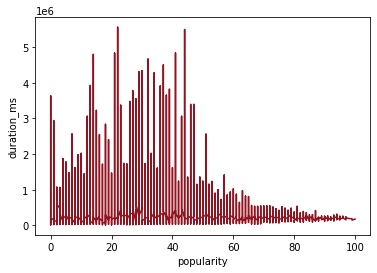

In [7]:
ds = sp.sort_values(by=['popularity'])
plt.plot(ds['popularity'], ds['duration_ms'], color='#91131f')
plt.xlabel('popularity')
plt.ylabel('duration_ms')
plt.show()

<BarContainer object of 26 artists>

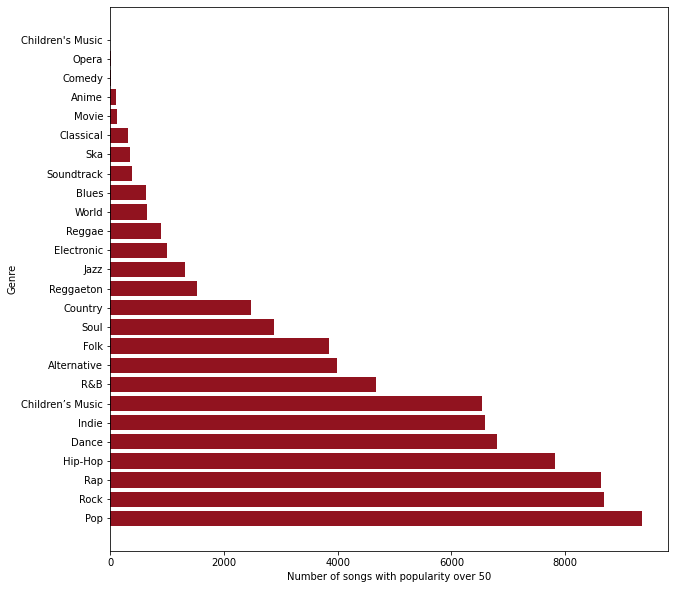

In [8]:
plt.figure(figsize = (10,10))
genres = sp[sp['popularity'] > 50]['genre'].value_counts()
plt.xlabel('Number of songs with popularity over 50')
plt.ylabel('Genre')
plt.barh(genres.index, genres, color='#91131f')

In [9]:
sp.sort_values('popularity').loc[(sp['genre'] == 'Children’s Music')].tail()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
77052,Children’s Music,Joji,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,84,0.5440,0.515,209274,0.479,0.005980,D#,0.191,-7.458,Major,0.0261,88.964,4/4,0.284
77054,Children’s Music,H.E.R.,Best Part (feat. Daniel Caesar),4OBZT9EnhYIV17t4pGw7ig,84,0.7950,0.473,209400,0.371,0.000000,E,0.109,-10.219,Minor,0.0405,75.208,4/4,0.413
77073,Children’s Music,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,84,0.0103,0.542,216933,0.853,0.000000,D#,0.108,-6.407,Minor,0.0498,105.256,4/4,0.370
77217,Children’s Music,ChocQuibTown,Pa Olvidarte (feat. Manuel Turizo) - Remix,2ktoFujjJtantyMoVdBJlX,85,0.0441,0.724,256418,0.791,0.000007,G,0.239,-5.411,Major,0.1690,176.011,4/4,0.856
77053,Children’s Music,YUNGBLUD,11 Minutes (with Halsey feat. Travis Barker),4mGdjNMo0RonTlOEb7cYg4,86,0.0116,0.464,239507,0.852,0.000000,B,0.108,-3.804,Major,0.0670,160.075,4/4,0.233


In [10]:
sp.loc[(sp['popularity'] > 50) & (sp['genre'] == 'Children\'s Music')].head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
71689,Children's Music,Tom's Music Box,Lullaby and Good Night,30y8W512Sf3RbhVDHF38vY,51,0.596,0.917,64322,0.185,0.859,D,0.129,-10.079,Major,0.12,94.029,3/4,0.775


In [11]:
sp.loc[(sp['track_name'].str.contains("Baby Shark")) & (sp['genre'] == 'Children\'s Music')]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
71652,Children's Music,Pinkfong,Baby Shark Music Box,07enmUOMmpuy7ZVUXHAPIk,44,0.68800,0.686,110523,0.121,0.885000,G,0.0793,-20.751,Major,0.1030,148.002,4/4,0.818
71671,Children's Music,Toddler Tunes,Baby Shark (The Shark Song),0BnTI0w7x5f5PPlWQzJFjo,40,0.00809,0.679,121500,0.310,0.000000,G,0.1030,-11.959,Major,0.0901,146.396,1/4,0.850
73177,Children's Music,Nursery Rhymes and Kids Songs,Baby Shark,3itMoTSgbtRZUvhZlOOYxb,3,0.45500,0.907,114977,0.335,0.000003,G,0.0711,-16.572,Major,0.0489,109.990,4/4,0.973


<AxesSubplot:>

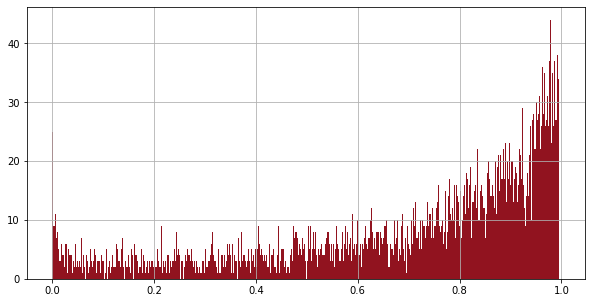

In [12]:
plt.figure(figsize = (10,5))
sp[sp['genre'] == 'Movie']['acousticness'].hist(bins=1000, color='#91131f')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc164eafd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc164eaf070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc164eaf190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc164c38df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc164eb3be0>],
 'means': []}

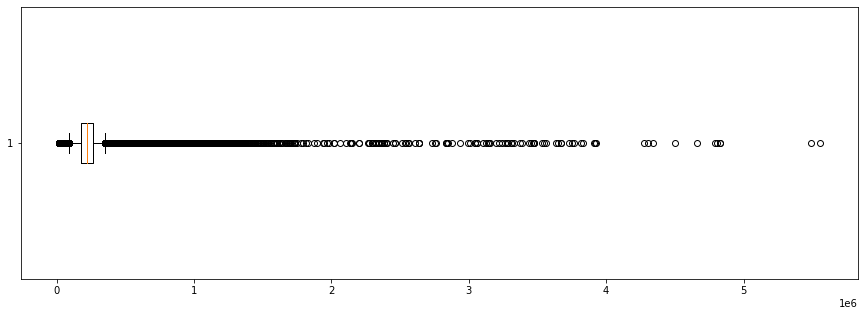

In [13]:
plt.figure(figsize = (15,5))
unique = sp.drop_duplicates(subset=['track_id'])
plt.boxplot(unique.duration_ms, vert=False, whis=0.96)

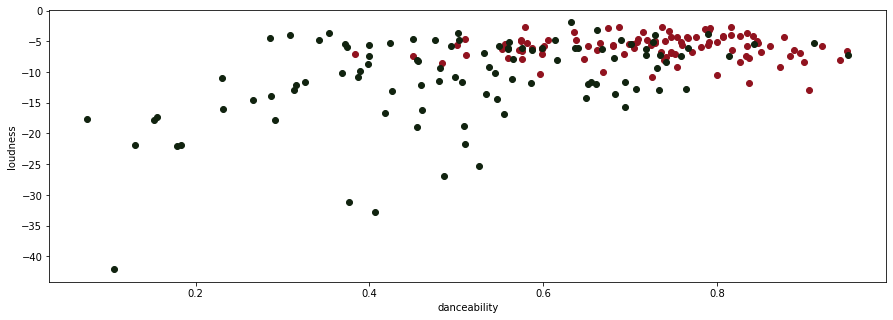

In [14]:
plt.figure(figsize = (15,5))
unique = sp.drop_duplicates(subset=['track_id'])
pop = unique.sort_values('popularity').tail(100)
rand = unique.sample(n = 100)
plt.xlabel('danceability')
plt.ylabel('loudness')
plt.scatter(pop['danceability'], pop['loudness'], color='#91131f')
plt.scatter(rand['danceability'], rand['loudness'], color='#11230f')

In [15]:
sp.loc[:, 'club'] = sp['danceability'] + sp['energy'] - sp['loudness'] / 100 + sp['popularity'] / 400
benchmark = max(sp['club'])
sp['club'] = sp['club'].apply(lambda x: x / benchmark)
sp.drop_duplicates(subset=['track_id']).sort_values('club', ascending = False).head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,club
14419,Dance,Eiffel 65,Blue (Da Ba Dee) - Gabry Ponte Ice Pop Radio,2yAVzRiEQooPEJ9SYx11L3,73,0.2590,0.822,283748,0.969,0.000162,G,0.3900,-11.471,Minor,0.0582,128.007,4/4,0.765,1.000000
91802,Hip-Hop,ScHoolboy Q,Big Body,7fQzRNL3k0YUkhTTSuZgcg,49,0.0724,0.944,223360,0.949,0.000000,C#,0.3480,-5.606,Minor,0.1900,116.012,4/4,0.763,0.992027
66904,Hip-Hop,Logic,Everybody,7cGFbx7MP0H23iHZTZpqMM,74,0.1580,0.885,162347,0.940,0.000000,C#,0.0675,-5.908,Major,0.0909,110.005,4/4,0.770,0.990839
20981,Dance,Sentidos Opuestos,Amor De Papel,6RTlokHIiobtIsthCLm3as,60,0.2350,0.827,248227,0.951,0.267000,E,0.1720,-13.509,Major,0.0535,129.995,4/4,0.865,0.987971
70416,Hip-Hop,Ghostemane,Andromeda,2ggqfj97qyiORmXoVFzP5j,62,0.1520,0.893,121979,0.907,0.031100,B,0.5580,-10.406,Major,0.3670,99.971,4/4,0.302,0.986041
17090,Dance,Eiffel 65,Blue (Da Ba Dee) - Gabry Ponte Video Edit,7lMIJ4EFWRVoAIPDpeGyM3,58,0.2270,0.829,219618,0.965,0.000131,G,0.4660,-11.498,Minor,0.0597,127.999,4/4,0.729,0.983608
19458,Dance,Gwen Stefani,Wind It Up,1GeECVH4Msg1zLm8DExkbH,48,0.3350,0.960,189587,0.895,0.000176,C,0.3640,-6.899,Minor,0.0714,120.010,4/4,0.920,0.978824
88773,Hip-Hop,Juelz Santana,There It Go (The Whistle Song),50UkypyQJbSQLaXHke5Yep,58,0.0220,0.947,180493,0.883,0.000478,F#,0.4220,-6.306,Minor,0.2080,100.004,4/4,0.560,0.975984
90614,Hip-Hop,Run–D.M.C.,It's Like That,2J6QnTjHIWwXErNWyF0RUC,53,0.0591,0.964,290280,0.889,0.000000,B,0.1660,-5.169,Major,0.1470,121.144,4/4,0.552,0.975568
158221,Reggaeton,El Alfa,Lo Tenemo - Remix,3TC1dZ8lFjy6eNqexzdPgL,53,0.3700,0.921,327959,0.933,0.000012,C#,0.8540,-5.046,Major,0.0772,116.015,4/4,0.823,0.975457


# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

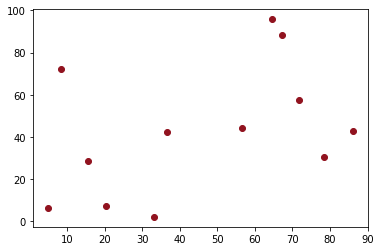

In [16]:
x_coord = np.random.rand(12) * 100
y_coord = np.random.rand(12) * 100
plt.plot(x_coord, y_coord, 'o', color='#91131f');

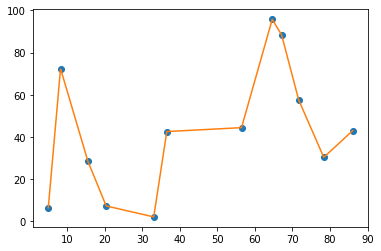

In [17]:
from scipy import interpolate
f = interpolate.interp1d(x_coord, y_coord, kind = 'linear')
newx = np.linspace(min(x_coord), max(x_coord), num = 1000)
ynew = f(newx)
plt.plot(x_coord, y_coord, 'o', newx, ynew, '-')
plt.show()

In [18]:
def lagrange(X, Y):
    def mul(xi, x):
        ans = 1
        for _x in X:
            if (_x != xi):
                ans *= (x - _x)
                ans /= (xi - _x)
        return ans
    def f(x):
        res = 0
        for i, xi in enumerate(X):
            res += Y[i] * mul(xi, x)
        return res
    return f

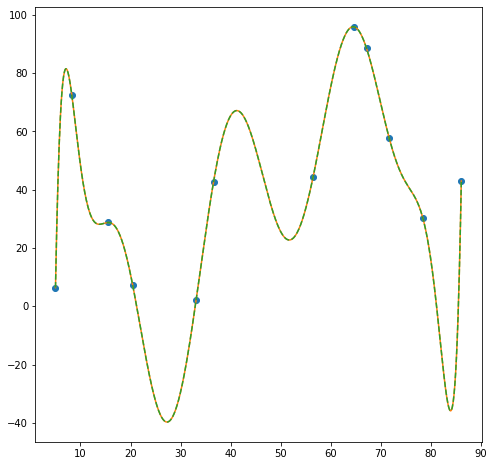

In [19]:
plt.figure(figsize = (8,8))
f = lagrange(x_coord, y_coord)
g = interpolate.lagrange(x_coord, y_coord)
plt.plot(x_coord, y_coord, 'o', newx, f(newx), '-', newx, g(newx), '--')
plt.show()

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


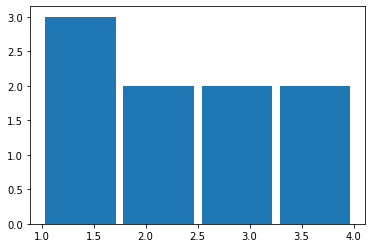

In [20]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [21]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    maximim = max(array)
    minimum = min(array)
    step = (maximim - minimum) / bins
    count = [0] * bins
    for i in array:
      count[min(int((i - minimum) / step) , bins - 1)] += 1
    return (count, np.arange(minimum, maximim, step))

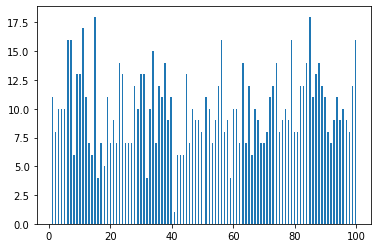

In [22]:
import random
ar = [random.randint(1, 100) for _ in range(1000)]
value_counts, bins_names, visual_figure = plt.hist(ar, 200)

<BarContainer object of 200 artists>

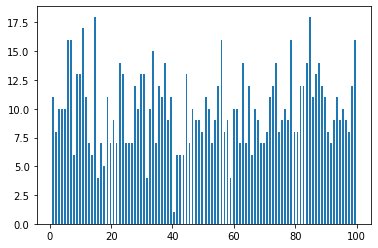

In [23]:
counts, names = fast_hist(ar, 200)
plt.bar(names, counts, width = 0.6)

122 ms ± 9.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
429 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


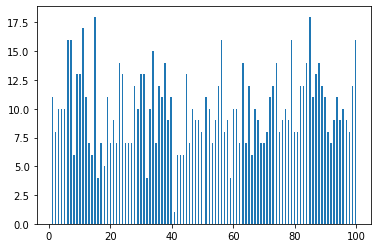

In [24]:
%timeit plt.hist(ar, 200)
%timeit fast_hist(ar, 200)